In [3]:
import warnings; warnings.simplefilter('ignore')

In [4]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
df.shape

(757141, 28)

In [7]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

Data Cleaning

In [10]:
missing_values = ['','-']
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv', na_values = missing_values)
df.drop_duplicates()
df['TIME OCC'] = (pd.to_datetime(df['TIME OCC'].fillna(0).astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.strftime('%H:%M').fillna('00:00'))

In [11]:
df['Mocodes'] = df['Mocodes'].astype(str).apply(lambda x:x.split())

In [12]:
df['Vict Age'] = df['Vict Age'].apply(lambda x : np.NaN if x<0 else x)

In [13]:
df['Crm Cds'] = df[['Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4']].values.tolist()
del df['Crm Cd 1']
del df['Crm Cd 2']
del df['Crm Cd 3']
del df['Crm Cd 4']

In [14]:
df['location'] = df[['LOCATION','Cross Street']].apply(lambda x: ','.join(x[x.notnull()]), axis = 1)

In [15]:
del df['LOCATION']
del df['Cross Street']

In [16]:
df['Vict Age'] = df.groupby('Crm Cd', group_keys=False)['Vict Age'].apply(lambda x : x.fillna(x.median()))

In [17]:
df['Premis Cd'] = df.groupby('Crm Cd', group_keys=False)['Premis Cd'].apply(lambda x : x.fillna(x.mode()))

In [18]:
df['Premis Desc'] = df.groupby('Crm Cd', group_keys=False)['Premis Desc'].apply(lambda x : x.fillna(x.mode()))

In [19]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

In [20]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [21]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,Crm Cds,location
0,10304468,2020-01-08,2020-01-08,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,"[624.0, nan, nan, nan]",1100 W 39TH PL
1,190101086,2020-01-02,2020-01-01,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,"[624.0, nan, nan, nan]",700 S HILL ST
2,200110444,2020-04-14,2020-02-13,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,34.0448,-118.2474,"[845.0, nan, nan, nan]",200 E 6TH ST
3,191501505,2020-01-01,2020-01-01,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,34.1685,-118.4019,"[745.0, 998.0, nan, nan]",5400 CORTEEN PL
4,191921269,2020-01-01,2020-01-01,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,34.2198,-118.4468,"[740.0, nan, nan, nan]",14400 TITUS ST


In [22]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age               0
Vict Sex           98912
Vict Descent       98919
Premis Cd              9
Premis Desc          442
Weapon Used Cd    494062
Weapon Desc       494062
Status                 0
Status Desc            0
LAT                    0
LON                    0
Crm Cds                0
location               0
dtype: int64

In [23]:
df = df.loc[~((df['Vict Age'].isnull())+(df['Premis Cd'].isnull())+(df['Premis Desc'].isnull()))]

Extracting year, month, day and weekday from 'DATE OCC' column

In [25]:
df['year']=df['DATE OCC'].dt.year

In [26]:
df['month']=df['DATE OCC'].dt.strftime('%b')

In [27]:
df['month_num'] = df['DATE OCC'].dt.month

In [28]:
df['day']=df['DATE OCC'].dt.day

In [29]:
df['weekday']=df['DATE OCC'].dt.strftime('%A')

In [30]:
df['weekday_num'] = df['DATE OCC'].dt.strftime('%w')

In [31]:
df[['DATE OCC','year','month','month_num','day','weekday','weekday_num']].head()

,DATE OCC,year,month,month_num,day,weekday,weekday_num
0,2020-01-08,2020,Jan,1,8,Wednesday,3
1,2020-01-01,2020,Jan,1,1,Wednesday,3
2,2020-02-13,2020,Feb,2,13,Thursday,4
3,2020-01-01,2020,Jan,1,1,Wednesday,3
4,2020-01-01,2020,Jan,1,1,Wednesday,3


#### Crime distribution across year

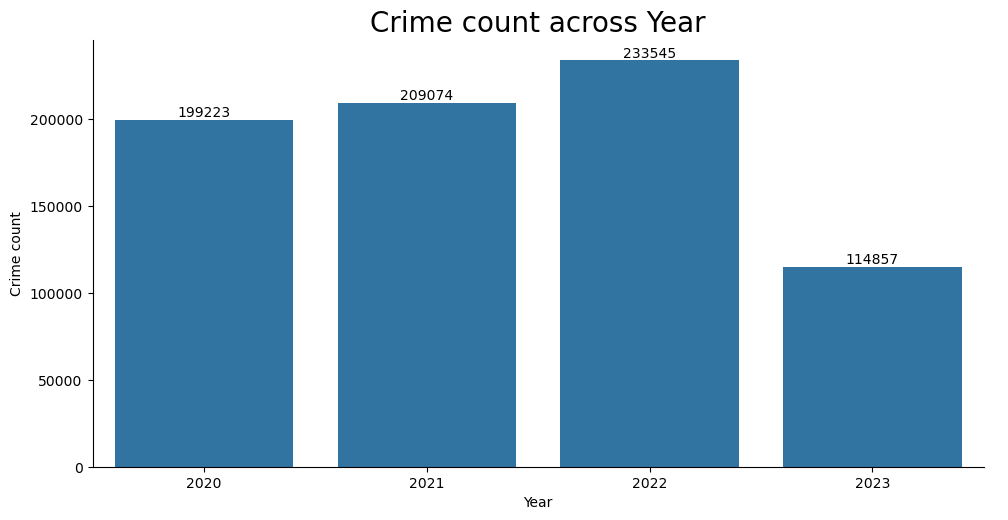

In [33]:
g = sns.catplot(x = "year", 
            data = df, 
            aspect = 2.0,
            kind = "count")
plt.title('Crime count across Year', fontsize = 20)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Crime count', fontsize = 10)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., 
                p.get_height(), 
                int(p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10)

plt.show()

#### Average monthly Crime Rate across years

In [35]:
df_year = df[df['DATE OCC'] < '2023-10-01'].groupby(['year','month_num'])['DR_NO'].count()

In [36]:
df_year = df_year.reset_index().rename(columns = {'DR_NO' : 'crime_count'})

In [37]:
df_year_grouped = df_year.groupby('year')['crime_count'].mean()

In [38]:
df_year_grouped = df_year_grouped.reset_index()

In [39]:
df_year_grouped['crime_count'] = df_year_grouped['crime_count'].round()

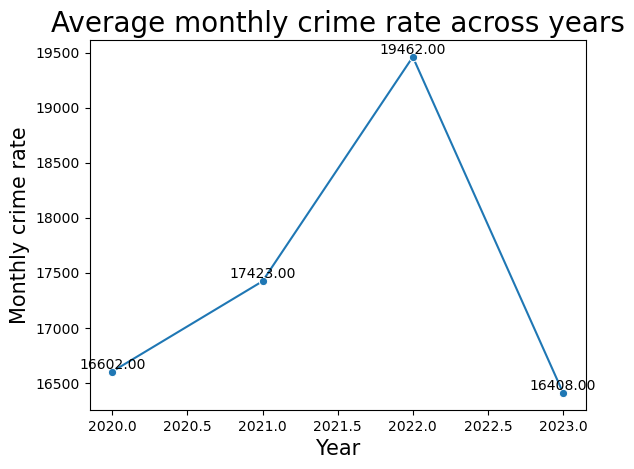

In [40]:
sns.lineplot(x = 'year', y = 'crime_count', data = df_year_grouped, marker = 'o')
plt.title('Average monthly crime rate across years', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Monthly crime rate', fontsize = 15)

# Annotate each point with its value
for x, y in zip(df_year_grouped['year'], df_year_grouped['crime_count']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

#### Crime distribution across months

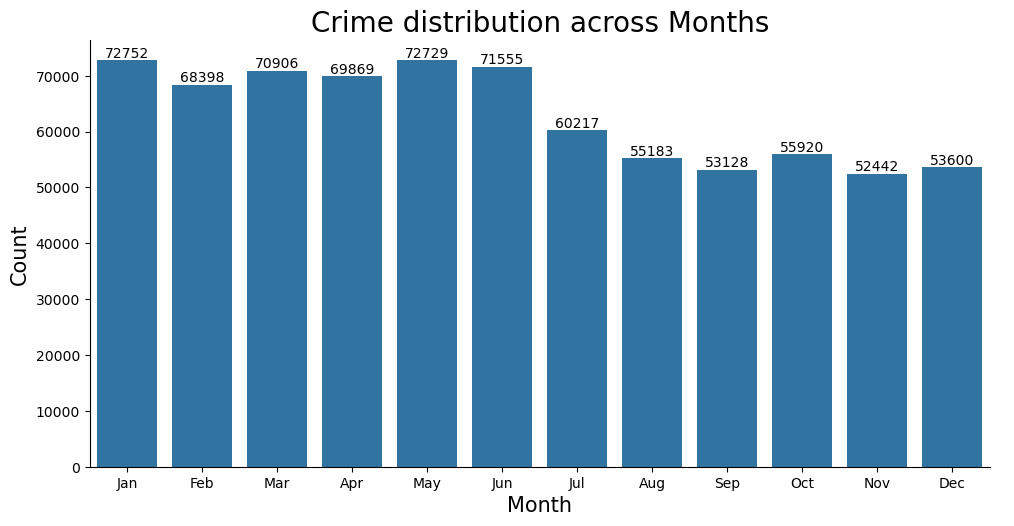

In [42]:
plot = sns.catplot(x = "month",
            data = df.sort_values(by = 'month_num'), 
            aspect = 2.0, 
            kind = "count")
plt.title('Crime distribution across Months', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Annotate each bar with its height (count)
for p in plot.ax.patches:
    plot.ax.text(
        p.get_x() + p.get_width() / 2,  # x-position of the text
        p.get_height(),  # y-position of the text
        f'{int(p.get_height())}',  # text showing the height of the bar
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.show()

#### Crime distribution across Months over years

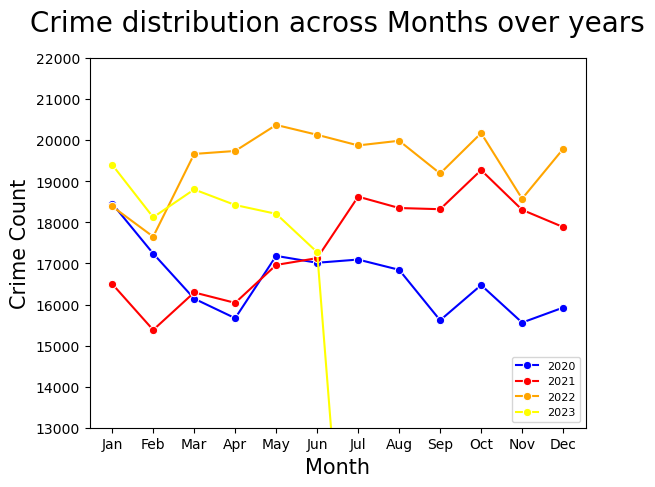

In [44]:
df_group = df.groupby(['year','month','month_num'])['DR_NO'].count()
df_group = df_group.reset_index().rename(columns = {'DR_NO' : 'crime_count'})
df_group = df_group[~((df_group.year == 2023)&(df_group.month_num == 10))]

ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2020].sort_values(by = 'month_num'), color = 'blue', marker = 'o', label = '2020')
ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2021].sort_values(by = 'month_num'), color = 'red', marker = 'o', label = '2021')
ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2022].sort_values(by = 'month_num'), color = 'orange', marker = 'o', label = '2022')
ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2023].sort_values(by = 'month_num'), color = 'yellow', marker = 'o', label = '2023')

ax.set_ylim(13000,22000)
plt.legend(fontsize = 8, loc = 'lower right')
plt.title('Crime distribution across Months over years', fontsize = 20, y=1.05)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.show()

#### Overall monthly trend

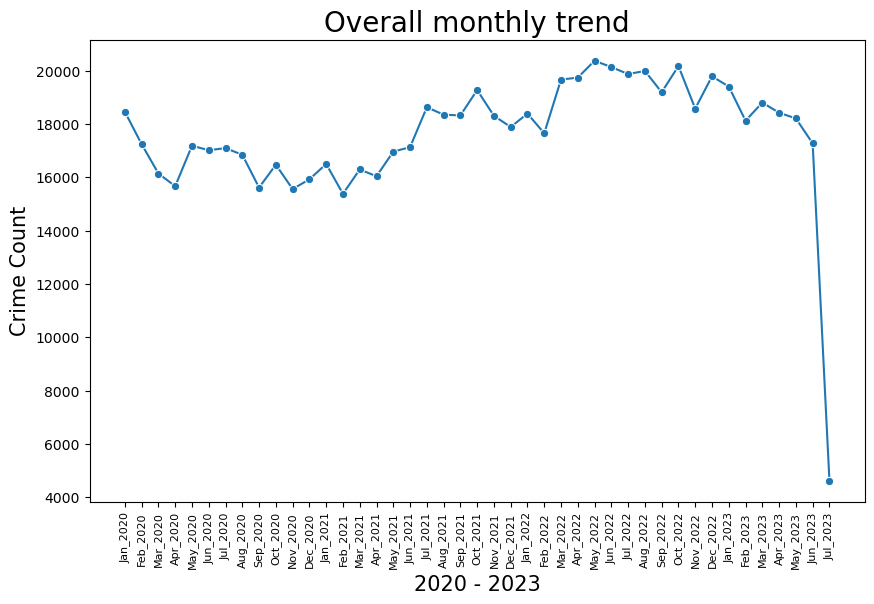

In [46]:
df_group['month_year'] = df_group['month'].astype(str) +'_'+ df_group['year'].astype(str)
plt.figure(figsize = (10,6))
plot = sns.lineplot(x = 'month_year', y = 'crime_count', data = df_group.sort_values(by = ['year','month_num']), marker = 'o')
plt.xlabel('2020 - 2023', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.title('Overall monthly trend', fontsize = 20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 8)
plt.show()

### Impact of Major Events - Earthquake and Covid Waves

#### Earthquakes
To analyse the impact of major events on the crime rate we looked at both major earthquakes data as well as Covid waves data. The below graphs show crime data with earthquake occurrences represented by red vertical lines. The major earthquakes that affected Los Angeles occurred on 24 June 2020, 30 September 2020, 08 July 2021, and 20 December 2022. After each of these earthquakes, the crime counts increased during the following days. This is potentially due to the opportunity that people have, to cause disorder following a chaos and damage producing event such as an earthquake.

George Floyd: On 25 May 2020 George Floyd was wrongfully murdered by Police Officers in Minneapolis, Minnesota. Following this were a wave of riots and protests throughout the country, especially Los Angeles County. During this time, we can see a sharp increase in crimes from April to May 2020 and remaining high for the next few months. Many of the riots in LA were violent and destructive which included an increase in theft and looting

In [50]:
date_e2 = '2020-06-24'
date_e2_s = '2020-06-17'
date_e2_f = '2020-07-01'

df_e2 = df[(df['DATE OCC'] >= date_e2_s)&(df['DATE OCC'] <= date_e2_f)]['DATE OCC'].value_counts()
df_e2 = df_e2.reset_index().rename(columns = {'count' : 'crime_count', 'DATE OCC' : 'Date'})

In [51]:
date_e3 = '2020-09-30'
date_e3_s = '2020-09-23'
date_e3_f = '2020-10-07'

df_e3 = df.loc[(df['DATE OCC'] >= date_e3_s)&(df['DATE OCC'] <= date_e3_f)]['DATE OCC'].value_counts()
df_e3 = df_e3.reset_index().rename(columns = {'DATE OCC' : 'Date', 'count' : 'crime_count'})

In [52]:
date_e4 = '2021-07-08'
date_e4_s = '2021-07-01'
date_e4_f = '2021-07-15'

df_e4 = df.loc[(df['DATE OCC'] >= date_e4_s)&(df['DATE OCC'] <= date_e4_f)]['DATE OCC'].value_counts()
df_e4 = df_e4.reset_index().rename(columns = {'DATE OCC' : 'Date', 'count' : 'crime_count'})

In [53]:
date_e5 = '2022-12-20'
date_e5_s = '2022-12-13'
date_e5_f = '2022-12-27'

df_e5 = df.loc[(df['DATE OCC'] >= date_e5_s)&(df['DATE OCC'] <= date_e5_f)]['DATE OCC'].value_counts()
df_e5 = df_e5.reset_index().rename(columns = {'DATE OCC' : 'Date', 'count' : 'crime_count'})

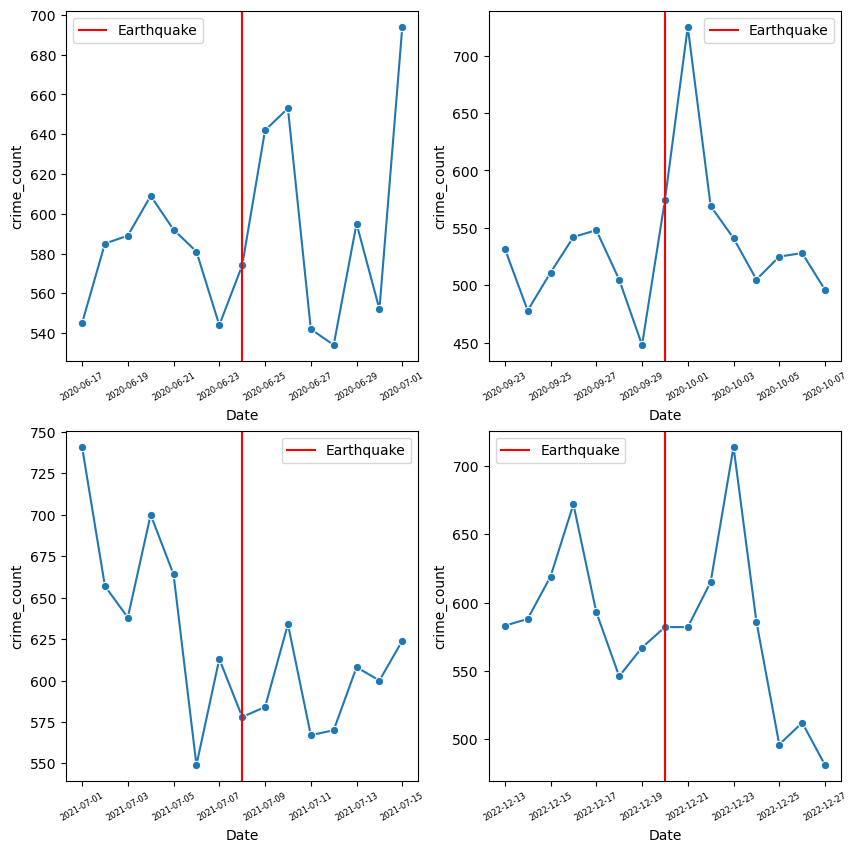

In [54]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

plot1 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e2, marker = 'o', ax = axes[0][0])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 30, fontsize = 6)
plot1.axvline(x = datetime.date(2020,6,24), color = 'red', label = 'Earthquake')
plot1.legend()

plot2 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e3, marker = 'o', ax = axes[0][1])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation = 30, fontsize = 6)
plot2.axvline(x = datetime.date(2020,9,30), color = 'red', label = 'Earthquake')
plot2.legend()

plot3 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e4, marker = 'o', ax = axes[1][0])
plot3.set_xticklabels(plot3.get_xticklabels(), rotation = 30, fontsize = 6)
plot3.axvline(x = datetime.date(2021,7,8), color = 'red', label = 'Earthquake')
plot3.legend()

plot4 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e5, marker = 'o', ax = axes[1][1])
plot4.set_xticklabels(plot4.get_xticklabels(), rotation = 30, fontsize = 6)
plot4.axvline(x = datetime.date(2022,12,20), color = 'red', label = 'Earthquake')
plot4.legend()
plt.show()

#### Covid-19

The below figure shows crime count per month from 2020 to September 2023 overlaid with vertical lines depicting the start and end of Covid-19 waves in the US. The vertical red lines depict the first wave of Covid-19 from March 2020 to January 2021, the start and end of the second wave is depicted by the vertical orange lines from March 2021 to January 2022 and the third wave is depicted by the vertical yellow lines from March 2022 to
November 2022.
During the first wave of Covid-19, the crime rates were relatively low. This is potentially due to the initial fear of the virus causing people to isolate and distance themselves from others or the restrictions that were put in place by the government causing many businesses to close and people to stay at home and off the streets.
During the second wave, the crime rate began to rise. This is most likely caused by society's declining fear of Covid-19. After the production of the vaccine and the decline of Covid-19 related deaths people were less likely to remain at home and isolate. Similarly, for the third wave the fear of the virus was almost completely lost and most people returned to normal daily life, businesses were open and government restrictions were removed. With
this the crime rate rose again.

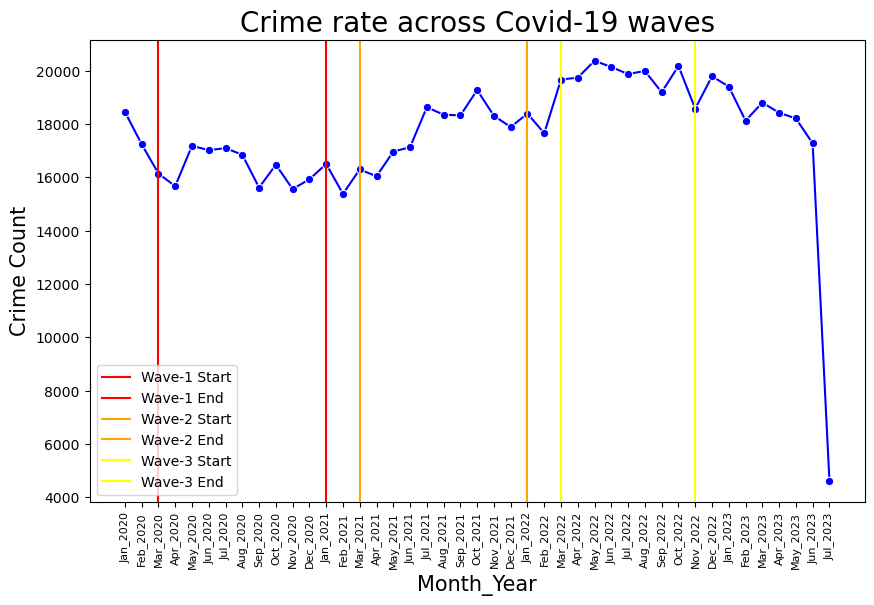

In [57]:
date_w1_start = '2020-03-01'
date_w1_end = '2021-01-31'
date_w2_start = '2021-03-01'
date_w2_end = '2022-01-31'
date_w3_start = '2022-03-01'
date_w3_end = '2022-10-31'

df_cov = df[df['DATE OCC'] < '2023-10-01']
df_cov = df_cov.groupby(['year','month','month_num'])['DR_NO'].count()
df_cov = df_cov.reset_index().rename(columns = {'DR_NO' : 'crime_count'})
df_cov['month_year'] = df_cov['month'].astype(str) +'_'+ df_cov['year'].astype(str)

plt.figure(figsize = (10,6))
plot = sns.lineplot(x = 'month_year', y = 'crime_count', data = df_cov.sort_values(by = ['year','month_num']), marker = 'o', color = 'blue')
plt.xlabel('Month_Year', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.title('Crime rate across Covid-19 waves', fontsize = 20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 8)
plot.axvline(x = 'Mar_2020', color = 'red', label = 'Wave-1 Start')
plot.axvline(x = 'Jan_2021', color = 'red', label = 'Wave-1 End')
plot.axvline(x = 'Mar_2021', color = 'orange', label = 'Wave-2 Start')
plot.axvline(x = 'Jan_2022', color = 'orange', label = 'Wave-2 End')
plot.axvline(x = 'Mar_2022', color = 'yellow', label = 'Wave-3 Start')
plot.axvline(x = 'Nov_2022', color = 'yellow', label = 'Wave-3 End')

plt.legend()
plt.show()

#### Recession

To visualize the effects of economic factors on the crime rate we used data from the most recent economic recession in the US. As displayed on the graph below, the start of the recession is depicted by the red vertical line (September 2022) and the end of the recession by the green vertical line (March 2023). The trends show that crimes generally decreased during the recession and continued to decrease for three months post-recession before
it began to increase again.

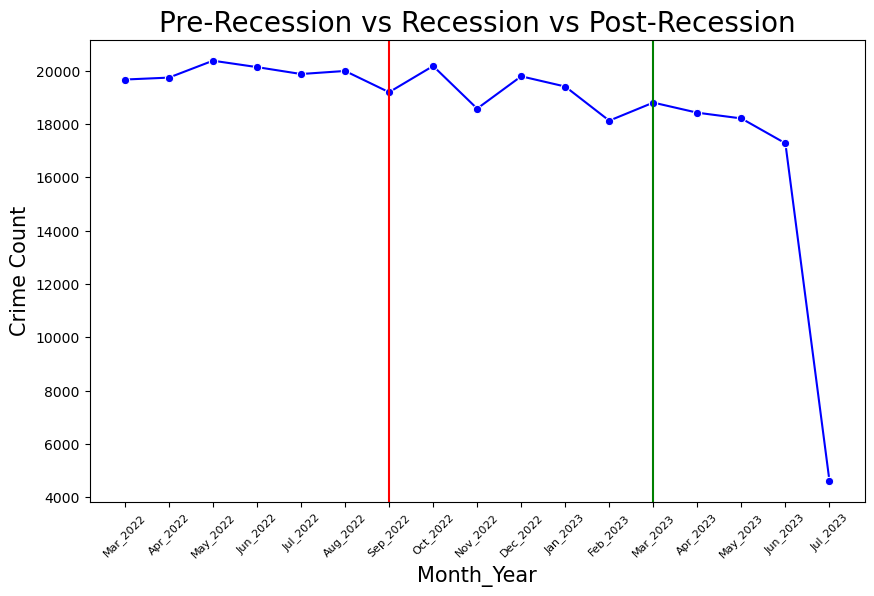

In [60]:
date_pre_rec = '2022-03-01'
date_rec_1 = '2022-09-01'
date_rec_2 = '2023-03-01'
date_post_rec = '2023-08-31'

df_rec = df[(df['DATE OCC'] >= date_pre_rec)&(df['DATE OCC'] <= date_post_rec)]
df_rec = df_rec.groupby(['year','month','month_num'])['DR_NO'].count()
df_rec = df_rec.reset_index().rename(columns = {'DR_NO' : 'crime_count'})
df_rec['month_year'] = df_rec['month'].astype(str) +'_'+ df_rec['year'].astype(str)

plt.figure(figsize = (10,6))
plot = sns.lineplot(x = 'month_year', y = 'crime_count', data = df_rec.sort_values(by = ['year','month_num']), marker = 'o', color = 'blue')
plt.xlabel('Month_Year', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.title('Pre-Recession vs Recession vs Post-Recession', fontsize = 20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45, fontsize = 8)
plot.axvline(x = 'Sep_2022', color = 'red', label = 'Recession Start')
plot.axvline(x = 'Mar_2023', color = 'green', label = 'Recession End')

plt.show()

#### Crime distribution across weekdays

weekday
Friday       115439
Saturday     110416
Wednesday    107658
Monday       107266
Thursday     106737
Sunday       105422
Tuesday      103761
Name: count, dtype: int64


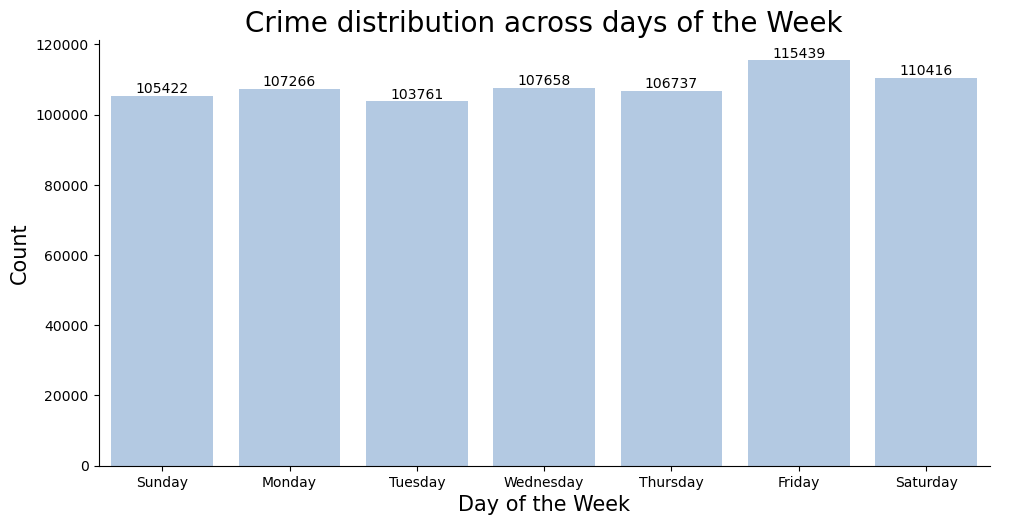

In [113]:
print(df['weekday'].value_counts())
plot1 = sns.catplot(x = "weekday", 
            data = df.sort_values(by = 'weekday_num'), 
            aspect = 2.0, 
            kind = "count", color= '#abc9ea')
plt.title('Crime distribution across days of the Week', fontsize = 20)
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

for p in plot1.ax.patches:
    plot1.ax.text(
        p.get_x() + p.get_width() / 2,  # x-position of the text
        p.get_height(),  # y-position of the text
        f'{int(p.get_height())}',  # text showing the height of the bar
        ha='center', 
        va='bottom', 
        fontsize=10
    )


plt.show()

#### Crime distribution across different timeframes in a day

In [120]:
def time_bin(x) :
    if x.time() < datetime.time(2) :
        return '00:00-02:00'
    elif x.time() < datetime.time(4) :
        return '02:00-04:00'
    elif x.time() < datetime.time(6) : 
        return '04:00-06:00'
    elif x.time() < datetime.time(8) :
        return '06:00-08:00'
    elif x.time() < datetime.time(10) :
        return '08:00-10:00'
    elif x.time() < datetime.time(12) :
        return '10:00-12:00'
    elif x.time() < datetime.time(14) :
        return '12:00-14:00'
    elif x.time() < datetime.time(16) :
        return '14:00-16:00'
    elif x.time() < datetime.time(18) :
        return '16:00-18:00'
    elif x.time() < datetime.time(20) :
        return '18:00-20:00'
    elif x.time() < datetime.time(22) :
        return '20:00-22:00'
    else :
        return '22:00-00:00'

In [122]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'])
df['time_bin'] = df['TIME OCC'].apply(time_bin)
df['TIME OCC'] = df['TIME OCC'].dt.strftime('%H:%M')
df[['TIME OCC','time_bin']]

,TIME OCC,time_bin
0,22:30,22:00-00:00
1,03:30,02:00-04:00
2,12:00,12:00-14:00
3,17:30,16:00-18:00
4,04:15,04:00-06:00
...,...,...
757136,18:00,18:00-20:00
757137,10:00,10:00-12:00
757138,16:30,16:00-18:00
757139,00:01,00:00-02:00


time_bin
18:00-20:00    86404
12:00-14:00    85725
16:00-18:00    83708
20:00-22:00    80297
14:00-16:00    76209
22:00-00:00    68667
10:00-12:00    65170
08:00-10:00    55301
00:00-02:00    54292
06:00-08:00    37161
02:00-04:00    36262
04:00-06:00    27503
Name: count, dtype: int64


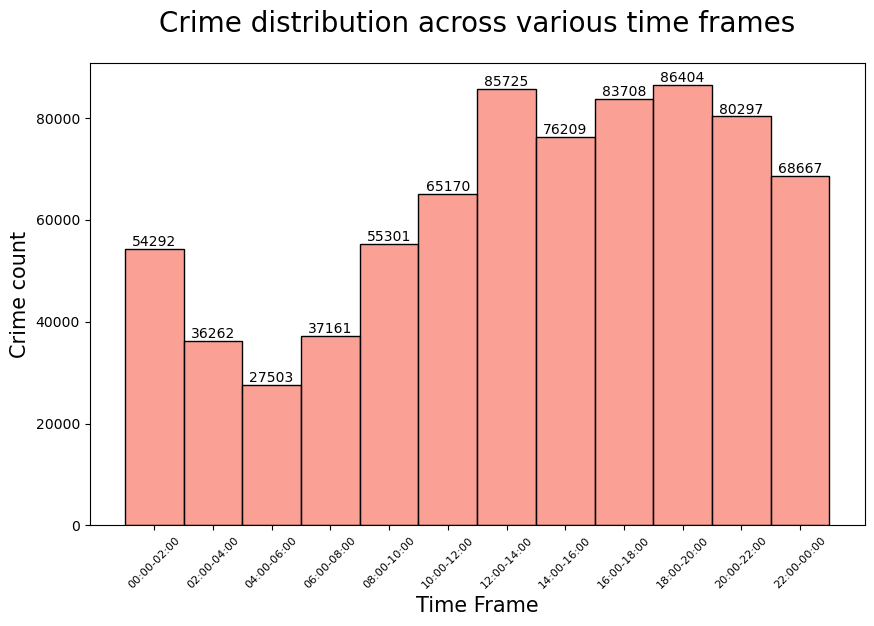

In [128]:
print(df['time_bin'].value_counts())
plt.figure(figsize = (10,6))
weekday_plot = sns.histplot(x = 'time_bin', data = df.sort_values(by = 'TIME OCC'), color = 'salmon')
weekday_plot.set_xticklabels(weekday_plot.get_xticklabels(), rotation = 45, fontsize = 8)
plt.title('Crime distribution across various time frames', fontsize = 20, y=1.05)
plt.xlabel('Time Frame', fontsize = 15)
plt.ylabel('Crime count', fontsize = 15)

for p in weekday_plot.patches:
    weekday_plot.annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points')

plt.show()

#### Top 10 Crime types

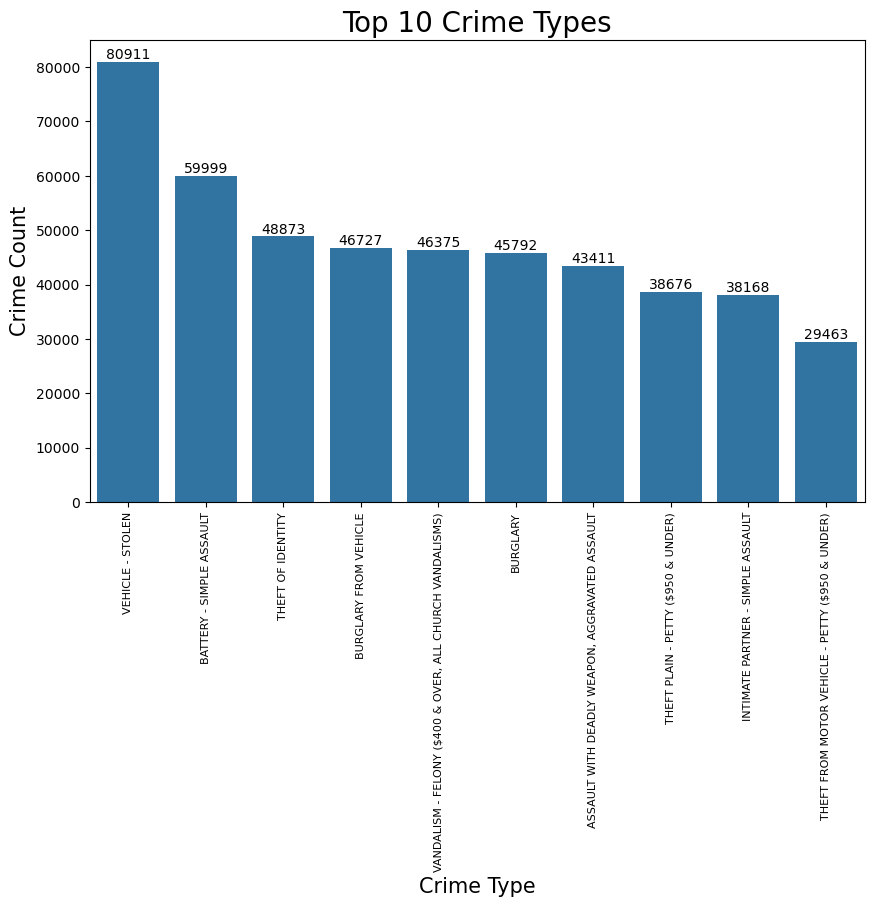

In [145]:
df_crime_types = df['Crm Cd Desc'].value_counts()
df_crime_types = df_crime_types.reset_index().rename(columns = {'Crm Cd Desc' : 'crime_type', 'count' : 'crime_count'})

plt.figure(figsize = (10,6))
crime_plot = sns.barplot(x = 'crime_type', y = 'crime_count', data = df_crime_types[:10])
crime_plot.set_xticklabels(crime_plot.get_xticklabels(), rotation = 90, fontsize = 8)
plt.title('Top 10 Crime Types', fontsize = 20)
plt.xlabel('Crime Type', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)

for p in crime_plot.patches:
    crime_plot.annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points')

plt.show()

#### Grouping the crime types

In [148]:
crime_groups = pd.read_csv('Crime_Groups.csv')
print(crime_groups.head())
print(crime_groups.describe())

                                         Crm Cd Desc           Group
0                           BATTERY - SIMPLE ASSAULT         Assault
1          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  Sexual Offence
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       Vandalism
3  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...       Vandalism
4                                     RAPE, FORCIBLE  Sexual Offence
                     Crm Cd Desc  Group
count                        138    138
unique                       138     13
top     BATTERY - SIMPLE ASSAULT  Other
freq                           1     37


In [152]:
df = df.merge(crime_groups, on = 'Crm Cd Desc')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cds,location,year,month,month_num,day,weekday,weekday_num,time_bin,Group
0,10304468,2020-01-08,2020-01-08,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,"[624.0, nan, nan, nan]",1100 W 39TH PL,2020,Jan,1,8,Wednesday,3,22:00-00:00,Assault
1,190101086,2020-01-02,2020-01-01,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,"[624.0, nan, nan, nan]",700 S HILL ST,2020,Jan,1,1,Wednesday,3,02:00-04:00,Assault
2,200110444,2020-04-14,2020-02-13,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,"[845.0, nan, nan, nan]",200 E 6TH ST,2020,Feb,2,13,Thursday,4,12:00-14:00,Sexual Offence
3,191501505,2020-01-01,2020-01-01,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,"[745.0, 998.0, nan, nan]",5400 CORTEEN PL,2020,Jan,1,1,Wednesday,3,16:00-18:00,Vandalism
4,191921269,2020-01-01,2020-01-01,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,"[740.0, nan, nan, nan]",14400 TITUS ST,2020,Jan,1,1,Wednesday,3,04:00-06:00,Vandalism


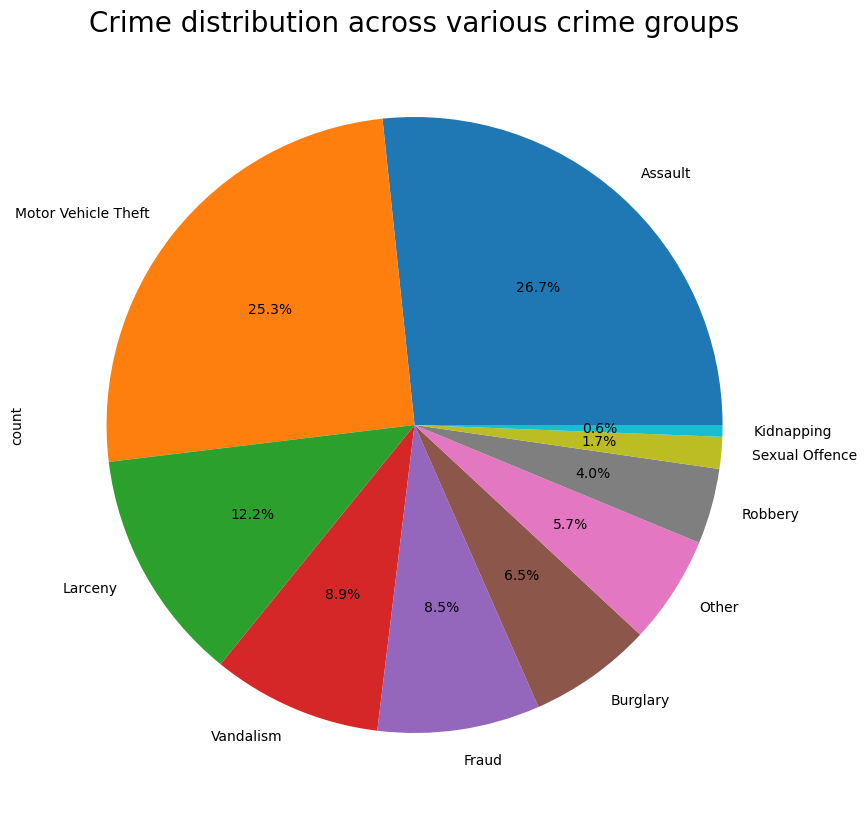

In [156]:
plt.figure(figsize = (10,10))
df['Group'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Crime distribution across various crime groups', fontsize = 20)
plt.show()

#### Boxplot for Victim Age across various Crime Groups

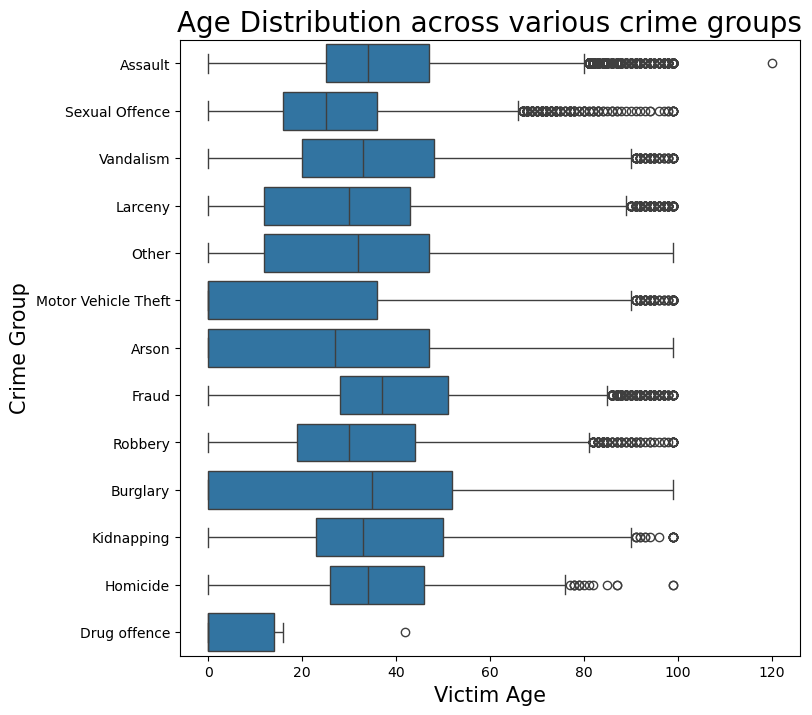

In [159]:
plt.figure(figsize = (8,8))
boxplt = sns.boxplot(data = df, x = 'Vict Age', y = 'Group')
plt.title('Age Distribution across various crime groups', fontsize = 20)
plt.xlabel('Victim Age', fontsize = 15)
plt.ylabel('Crime Group', fontsize = 15)
plt.show()

#### Boxplot for Victim Age across various Victim Descents

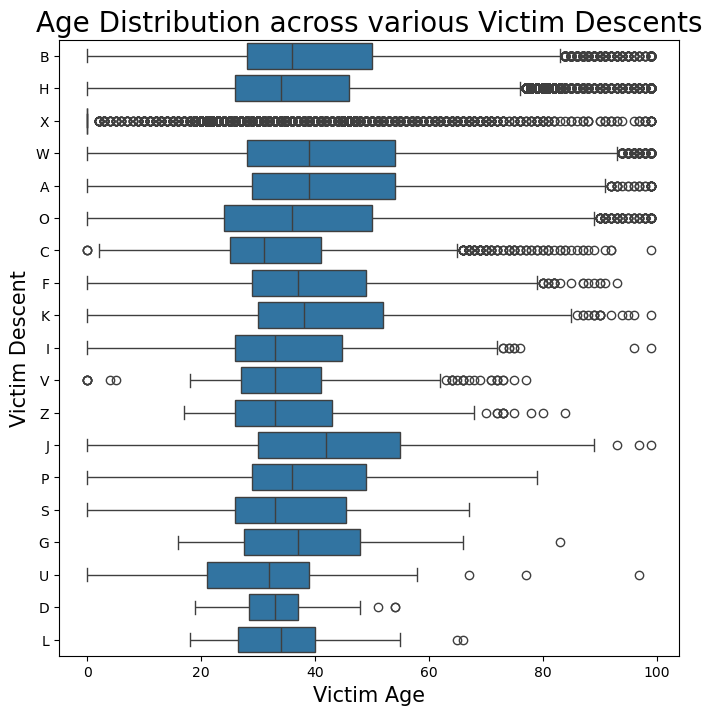

In [162]:
plt.figure(figsize = (8,8))
boxplt = sns.boxplot(data = df, x = 'Vict Age', y = 'Vict Descent')
plt.title('Age Distribution across various Victim Descents', fontsize = 20)
plt.xlabel('Victim Age', fontsize = 15)
plt.ylabel('Victim Descent', fontsize = 15)
plt.show()

#### Crime distribution across various locations

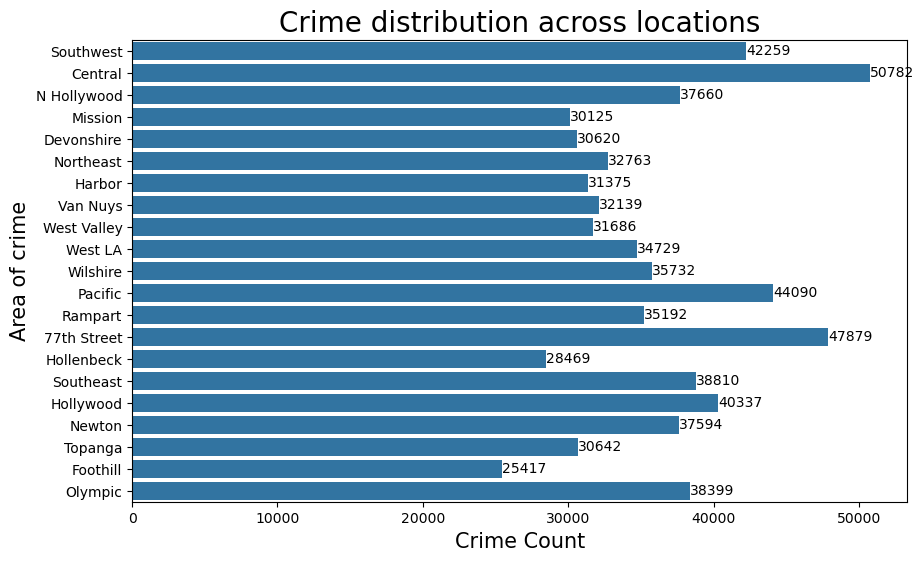

In [170]:
plt.figure(figsize = (10,6))
count_plot = sns.countplot(data=df, y='AREA NAME')
plt.title('Crime distribution across locations', fontsize = 20)
plt.xlabel('Crime Count', fontsize = 15)
plt.ylabel('Area of crime', fontsize = 15)

for container in count_plot.containers:
    count_plot.bar_label(container)

plt.show()

#### Crime distribution across Victim's sexes

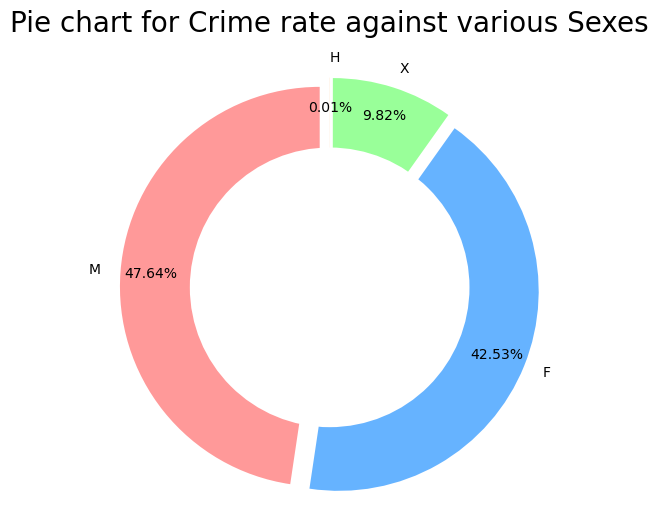

In [183]:
sex = df['Vict Sex'].value_counts().reset_index().rename(columns = {'count':'Crime Count','Vict Sex':'sex'})
labels = sex['sex']
sex['size'] = sex['Crime Count']/(sex['Crime Count'].sum())*100
sizes = sex['size']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Pie chart for Crime rate against various Sexes', fontsize = 20, y=1.05)
plt.show()

#### Crime distribution across various descents

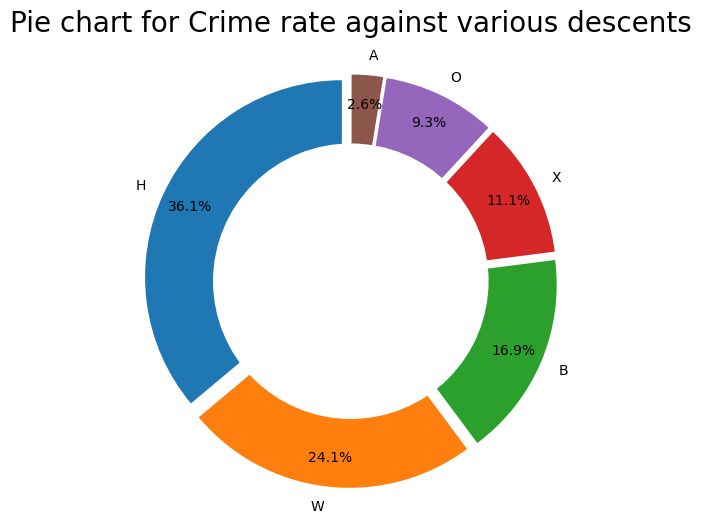

In [188]:
descent = df['Vict Descent'].value_counts()[:6].reset_index().rename(columns = {'Vict Descent':'Descent','count':'Crime Count'})
labels = descent['Descent']
descent['size'] = descent['Crime Count']/(descent['Crime Count'].sum())*100
sizes = descent['size']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Pie chart for Crime rate against various descents', fontsize = 20, y=1.05)
plt.show()

#### Timeseries forecasting for next 90 days

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


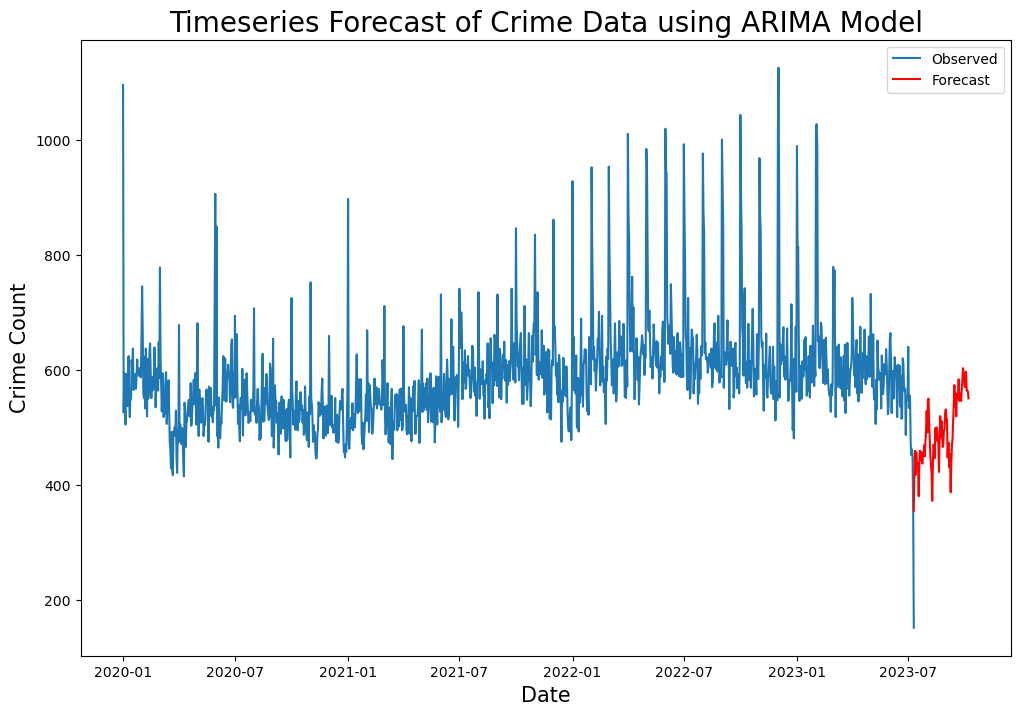

In [215]:
from statsmodels.tsa.arima.model import ARIMA

df_ts = df[df['DATE OCC'] < '2023-10-01']
df_ts = df_ts.groupby('DATE OCC').size().reset_index(name='COUNT')
df_ts = df_ts.set_index('DATE OCC')

model = ARIMA(df_ts, order=(1, 0, 100))
model_fit = model.fit()

forecast_days = 90
forecast = model_fit.forecast(steps=forecast_days)
forecast_dates = pd.date_range(start=df_ts.index[-1], periods=forecast_days)

plt.figure(figsize=(12, 8))
plt.plot(df_ts.index, df_ts['COUNT'], label='Observed')
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.legend()
plt.title('Timeseries Forecast of Crime Data using ARIMA Model', fontsize = 20)
plt.show()